In [16]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt5
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py

import time
import os
import sys
sys.path.insert(0, os.getcwd())
import scipy as sp
import json

In [18]:
import matplotlib.style as style
mplstyle_path = os.path.join(os.getcwd(), 'prx.mplstyle')
style.use(mplstyle_path)

# Save paths

Change as necessary.

In [19]:
# save_plot_path = 'S:\\QRAM\\qram_4QR2\\plots\\paper'
save_plot_path = os.getcwd()
print("Will save all plots to", save_plot_path)

Will save all plots to s:\Connie\experiments\qram_tprocv1_expts\data_plot


In [20]:
z = 1.96 # student's number for the error bars of 95% confidence

# Fig 2: rabi oscillations from right/wrong switch state

In [21]:
color_dict = {'q1q3_right': '#5b9faeff', 'q1q3_wrong': '#2f5760ff', 'q1q2_right': '#e5717aff', 'q1q2_wrong': '#a31f29ff'}
star_color_dict = {'q1q3_right': '#92bfc9ff', 'q1q3_wrong': '#2f5760ff', 'q1q2_right': '#e9868eff', 'q1q2_wrong': '#a31f29ff'}

highlight_color = "#b2b083ff"
# f_right_13 = 5139.60
f_right_13 = 5126.94
f_wrong_13 = f_right_13 - 6.5
len_13 = 0.067 * 2

f_right_12 = 5883.77
f_wrong_12 = f_right_12 + 4.8
len_12 = 0.213 * 2

In [22]:
data_dir = os.path.join(os.getcwd())

## Fig 2a-d: rabi chevron

In [23]:
chevron_filename_q1q3_right = '00002_rabi_EgGf_freqlen_chevron_qubit31.h5'
chevron_filename_q1q3_wrong = '00003_rabi_EgGf_freqlen_chevron_qubit31.h5'
chevron_filename_q1q2_right = '00002_rabi_EgGf_freqlen_chevron_qubit21.h5'
chevron_filename_q1q2_wrong = '00003_rabi_EgGf_freqlen_chevron_qubit21.h5'

folder = 'rabi_swap'

files = []

for f in [chevron_filename_q1q3_right, chevron_filename_q1q3_wrong, chevron_filename_q1q2_right, chevron_filename_q1q2_wrong]:
    full_path = os.path.join(data_dir, folder, f)
    file = h5py.File(full_path, 'r')
    print("Loaded file:", full_path)
    files.append(file)

Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00002_rabi_EgGf_freqlen_chevron_qubit31.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00003_rabi_EgGf_freqlen_chevron_qubit31.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00002_rabi_EgGf_freqlen_chevron_qubit21.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00003_rabi_EgGf_freqlen_chevron_qubit21.h5


In [10]:
qb_plot = 0
data_13 = 'amps'
data_12 = 'amps'

amp_13_right_2d = np.asarray(files[0][data_13])
amp_13_wrong_2d = np.asarray(files[1][data_13])
amp_12_right_2d = 1 - np.asarray(files[2][data_12])
amp_12_wrong_2d = 1 - np.asarray(files[3][data_12])

freqs_13_right = np.asarray(files[0]['freqpts'])
freqs_13_wrong = np.asarray(files[1]['freqpts'])
freqs_12_right = np.asarray(files[2]['freqpts'])
freqs_12_wrong = np.asarray(files[3]['freqpts'])

t13_right_2d = np.asarray(files[0]['lenpts'])*2*1e-3
t13_wrong_2d = np.asarray(files[1]['lenpts'])*2*1e-3
t12_right_2d = np.asarray(files[2]['lenpts'])*2*1e-3
t12_wrong_2d = np.asarray(files[3]['lenpts'])*2*1e-3

## Fig 2a-d

Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\chevron_combined_swap00002_swap00003__rabi_EgGf_freqlen_chevron_swap00002_swap00003__rabi_EgGf_freqlen_chevron.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\chevron_combined_swap00002_swap00003__rabi_EgGf_freqlen_chevron_swap00002_swap00003__rabi_EgGf_freqlen_chevron.svg


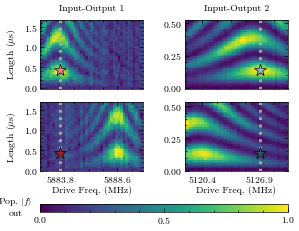

In [12]:
labelsize = 7

fig, ax = plt.subplots(2, 2, figsize=(3.0, 2.8))
fig.subplots_adjust(hspace=0.2, wspace=0.4)

y_12_right_2d = -amp_12_right_2d[qb_plot].T ## minus sign to match the amplitude of the other qubit
y_12_wrong_2d = -amp_12_wrong_2d[qb_plot].T

y_12_right_scaled_2d = (y_12_right_2d - y_12_right_2d[0])/(np.max(y_12_right_2d) - np.min(y_12_right_2d))
y_12_wrong_scaled_2d = (y_12_wrong_2d - y_12_wrong_2d[0])/(np.max(y_12_right_2d) - np.min(y_12_right_2d))

y_13_right_2d = amp_13_right_2d[qb_plot].T
y_13_wrong_2d = amp_13_wrong_2d[qb_plot].T 
y_13_right_scaled_2d = (y_13_right_2d - y_13_right_2d[0])/(np.max(y_13_right_2d) - np.min(y_13_right_2d))
y_13_wrong_scaled_2d = (y_13_wrong_2d - y_13_wrong_2d[0])/(np.max(y_13_right_2d) - np.min(y_13_right_2d))


x_12_right_2d = freqs_12_right
x_12_wrong_2d = freqs_12_wrong

x_13_right_2d = freqs_13_right
x_13_wrong_2d = freqs_13_wrong



# COLUMN 1 FOR Q1-Q2
ax[0, 0].set_title("Input-Output 1", fontsize=labelsize)
ax[0, 0].pcolor(x_12_right_2d, t12_right_2d*1e3, y_12_right_scaled_2d, cmap='viridis')
ax[0, 0].axvline(f_right_12, color=highlight_color, linestyle=':', linewidth=2)
ax[0, 0].scatter(f_right_12, len_12, marker='*', c=star_color_dict["q1q2_right"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[1, 0].pcolor(x_12_wrong_2d, t12_wrong_2d*1e3, y_12_wrong_scaled_2d, cmap='viridis')
ax[1, 0].axvline(f_right_12, color=highlight_color, linestyle=':', linewidth=2)
ax[1, 0].scatter(f_right_12, len_12, marker='*', c=star_color_dict["q1q2_wrong"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[1, 0].set_xlabel('Drive Freq. (MHz)', fontsize=labelsize, labelpad=0.1)
ax[1, 0].set_ylabel('Length ($\mu$s)', fontsize=labelsize)
ax[0, 0].set_ylabel('Length ($\mu$s)', fontsize=labelsize)
ax[0, 0].set_yticks([0, 0.5, 1.0, 1.5])
ax[1, 0].set_yticks([0, 0.5, 1.0, 1.5])
plt.setp(ax[0, 0].get_xticklabels(), visible=False)
ax[1, 0].set_xticks([np.round(f_right_12, 1), np.round(f_wrong_12, 1)])
ax[0, 0].sharex(ax[1, 0])



for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)


# COLUMN 2 FOR Q1-Q3
ax[0, 1].set_title("Input-Output 2", fontsize=labelsize)
ax[0, 1].pcolor(x_13_right_2d, t13_right_2d*1e3,y_13_right_scaled_2d, cmap='viridis')
ax[0, 1].axvline(f_right_13, color=highlight_color, linestyle=':', linewidth=2)
ax[0, 1].scatter(f_right_13, len_13, marker='*', c=star_color_dict["q1q3_right"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[1, 1].pcolor(x_13_wrong_2d, t13_wrong_2d*1e3, y_13_wrong_scaled_2d, cmap='viridis')
ax[1, 1].axvline(f_right_13, color=highlight_color, linestyle=':', linewidth=2)
ax[1, 1].scatter(f_right_13, len_13, marker='*', c=star_color_dict["q1q3_wrong"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[1, 1].set_xlabel('Drive Freq. (MHz)', fontsize=labelsize, labelpad=0.1)
ax[0, 1].set_yticks([0, 0.25, 0.5])
ax[1, 1].set_yticks([0, 0.25, 0.5])
plt.setp(ax[0, 1].get_xticklabels(), visible=False)
ax[1, 1].set_xticks([np.round(f_right_13, 1), np.round(f_wrong_13, 1)])
ax[0, 1].sharex(ax[1, 1])


# add a colorbar
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='viridis'), ax=ax, location='bottom', aspect=30, ticks=[0, 0.5, 1], pad=0.15)
cbar.ax.set_xlabel(r'Pop. $\left|f\right>$' + '\nout', fontsize=labelsize)
cbar.ax.xaxis.set_label_coords(-0.1, 2.0)
cbar.ax.tick_params(labelsize=labelsize, pad=2)

# put the colorbar closer to the figure
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')


for filetype in ['pdf', 'svg']:
    filenames = [chevron_filename_q1q3_right, chevron_filename_q1q3_wrong]
    filepaths_str_13 = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

    filenames = [chevron_filename_q1q2_right, chevron_filename_q1q2_wrong]
    filepaths_str_12 = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

    filepaths_str = filepaths_str_13 + '_' + filepaths_str_12


    savename = os.path.join(save_plot_path, f'chevron_combined_{filepaths_str}.{filetype}')
    print("Saving", savename)
    fig.savefig(savename)

## Fig 2e-f swap length rabi

In [25]:
filename_q1q3_right = '00077_length_rabi_EgGf_qubit31.h5'
filename_q1q3_wrong = '00078_length_rabi_EgGf_qubit31.h5'
filename_q1q2_right = '00070_length_rabi_EgGf_qubit21.h5'
filename_q1q2_wrong = '00071_length_rabi_EgGf_qubit21.h5'

folder = 'rabi_swap'

files = []

for f in [filename_q1q3_right, filename_q1q3_wrong, filename_q1q2_right, filename_q1q2_wrong]:
    full_path = os.path.join(data_dir, folder, f)
    file = h5py.File(full_path, 'r')
    print("Loaded file:", full_path)
    files.append(file)

Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00077_length_rabi_EgGf_qubit31.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00078_length_rabi_EgGf_qubit31.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00070_length_rabi_EgGf_qubit21.h5
Loaded file: s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_swap\00071_length_rabi_EgGf_qubit21.h5


In [14]:
t13_right = 2*np.asarray(files[0]['xpts']) # multiply by 2 to get the pi length
t13_wrong = 2*np.asarray(files[1]['xpts'])
t12_right = 2*np.asarray(files[2]['xpts'])
t12_wrong = 2*np.asarray(files[3]['xpts'])
amp_13_right = np.asarray(files[0]['amps'])
amp_13_wrong = np.asarray(files[1]['amps'])

amp_12_right = np.asarray(files[2]['avgi'])
amp_12_wrong = np.asarray(files[3]['avgi'])

swap00077_swap00078_swap00070_swap00071__length_rabi_EgGf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_eg_gf_swap00077_swap00078_swap00070_swap00071__length_rabi_EgGf.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\rabi_eg_gf_swap00077_swap00078_swap00070_swap00071__length_rabi_EgGf.svg


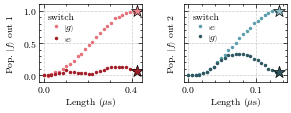

In [15]:
labelsize = 7

fig, ax = plt.subplots(1, 2, figsize=(3.0, 1.0), sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.4)

y3_right = amp_13_right[0]
y3_wrong = amp_13_wrong[0]

y13_1_scaled = (y3_right - y3_right[0])/(np.max(y3_right) - np.min(y3_right))
y13_2_scaled = (y3_wrong - y3_wrong[0])/(np.max(y3_right) - np.min(y3_right)) 


y2_right = amp_12_right[0]
y2_wrong = amp_12_wrong[0]

y12_1_scaled = (y2_right - y2_right[0])/(np.max(y2_right) - np.min(y2_right))
y12_2_scaled = (y2_wrong - y2_wrong[0])/(np.max(y2_right) - np.min(y2_right))

idx_stop_12 = np.argmax(y12_1_scaled)# + 2
idx_stop_13 = np.argmax(y13_1_scaled)# + 2

plt.sca(ax[1])
plt.grid(color='k', alpha=0.2)
ax[1].plot(t13_right[:idx_stop_13], y13_1_scaled[:idx_stop_13], '.', label=r'$\left|e\right>$', color=color_dict['q1q3_right'])
ax[1].scatter(t13_right[idx_stop_13], y13_1_scaled[idx_stop_13], marker='*', c=star_color_dict["q1q3_right"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[1].plot(t13_wrong[:idx_stop_13], y13_2_scaled[:idx_stop_13], '.', label=r'$\left|g\right>$', color=color_dict['q1q3_wrong'])
ax[1].scatter(t13_wrong[idx_stop_13], y13_2_scaled[idx_stop_13], marker='*', c=star_color_dict["q1q3_wrong"], edgecolors='k', s=80, linewidths=0.5, zorder=10)


plt.sca(ax[0])
plt.grid(color='k', alpha=0.2)
ax[0].plot(t12_right[:idx_stop_12], y12_1_scaled[:idx_stop_12], '.', label=r'$\left|g\right>$', color=color_dict['q1q2_right'])
ax[0].scatter(t12_right[idx_stop_12], y12_1_scaled[idx_stop_12], marker='*', c=star_color_dict["q1q2_right"], edgecolors='k', s=80, linewidths=0.5, zorder=10)
ax[0].plot(t12_wrong[:idx_stop_12], y12_2_scaled[:idx_stop_12], '.', label=r'$\left|e\right>$', color=color_dict['q1q2_wrong'])
ax[0].scatter(t12_wrong[idx_stop_12], y12_2_scaled[idx_stop_12], marker='*', c=star_color_dict["q1q2_wrong"], edgecolors='k', s=80, linewidths=0.5, zorder=10)

ax[0].set_ylabel(r'Pop. $\left|f\right>$ out 1', fontsize=labelsize)
# ax[1].set_ylabel(r'Pop. $|e\rangle$ out2')

ax[0].set_xlabel('Length ($\mu$s)', fontsize=labelsize, labelpad=0.3)
ax[0].set_xticks([0, 0.4])
ax[0].set_xlim(None, 0.45)
ax[0].set_ylim(-0.1, 1.1)
ax[0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax[0].legend(title='switch', frameon=False, handletextpad=0.1, labelspacing=0.1, title_fontsize=labelsize, fontsize=labelsize) #, frameon=True, framealpha=0.7

ax[1].set_ylabel(r'Pop. $\left|f\right>$ out 2', fontsize=labelsize)
ax[1].set_xlabel('Length ($\mu$s)', fontsize=labelsize, labelpad=0.3)
ax[1].set_xticks([0, 0.10])
ax[1].set_xlim(None, 0.145)
ax[1].set_ylim(-0.1, 1.1)
ax[1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

ax[1].legend(title='switch', frameon=False, handletextpad=0.1, labelspacing=0.1, title_fontsize=labelsize, fontsize=labelsize) #, frameon=True, framealpha=0.7

filenames = [filename_q1q3_right, filename_q1q3_wrong, filename_q1q2_right, filename_q1q2_wrong]

filepaths_str = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

print(filepaths_str)

savename = os.path.join(save_plot_path, f'rabi_eg_gf_{filepaths_str}.pdf')
print("Saving", savename)
plt.savefig(savename)

savename = os.path.join(save_plot_path, f'rabi_eg_gf_{filepaths_str}.svg')
print("Saving", savename)
plt.savefig(savename)

plt.show()

# Fig A3: error amplification calibrations

## Fig A3c swap pi/-pi

In [16]:
filepaths_str = "25011900072_PiMinusPiEgGfExptQ31"
pmp_folder = os.path.join(os.getcwd(), 'PMP_SWAP')
savename = os.path.join(pmp_folder, f'piminuspi_{filepaths_str}.npz')

# load the data
data = np.load(savename, allow_pickle=True)

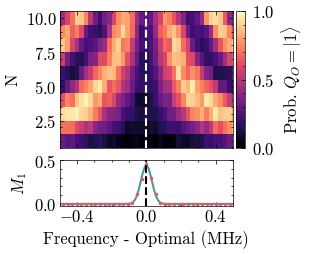

25011900072_PiMinusPiEgGfExptQ31
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\piminuspi_25011900072_PiMinusPiEgGfExptQ31.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\piminuspi_25011900072_PiMinusPiEgGfExptQ31.svg


In [17]:
inner_sweep = data["freq_sweep"]
outer_sweep = data["cycle_sweep"]
y_fit = data['y_fit']
x_sweep_fit = data['x_sweep_fit']

y_sweep = outer_sweep
x_sweep = inner_sweep

prod_data = data["products"][0] * data["products"][1]
x_sweep_fit = np.linspace(x_sweep[0], x_sweep[-1], 300)



fit_freq = 0
labelsize = 12
cmap = 'magma'

fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios':[1, 0.05]}, figsize=(3.0, 2.5))

axes[1,1].remove()

a0 = axes[0, 0]
plt.sca(a0)
a0.set_ylabel(f"N", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelbottom=False, labelsize=labelsize, pad=2)
data_name = "amps"
plot_data = data[data_name][0] # 0 for qDrive, 1 for q1
scaled_e = np.max(plot_data)
scaled_g = np.min(plot_data)
scale_ge = scaled_e - scaled_g
plot_data = (plot_data - scaled_g) / scale_ge
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap=cmap, shading="auto")
plt.axvline(fit_freq, color="w", linestyle="--")

acbar = axes[0, 1]
# plt.sca(acbar)
cbar = plt.colorbar(cax=acbar, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label('Prob. $Q_O=|1\\rangle$', size=labelsize)

a1 = axes[1, 0]
a1.sharex(a0)
plt.sca(a1)
a1.set_ylabel("$M_1$", fontsize=labelsize)
a1.set_xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a1.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.plot(x_sweep_fit, y_fit)
plt.plot(x_sweep, prod_data, ".")
plt.axvline(fit_freq, color="k", linestyle="--")
# plt.ylim([-0.05, 0.6])
a1.set_yticks([0.0, 0.5])
plt.xlim([-0.5, 0.5])
a1.set_xticks([-0.4, 0, 0.4])

plt.tight_layout(pad=0.2)
plt.show()

print(filepaths_str)

savename = os.path.join(save_plot_path, f'piminuspi_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'piminuspi_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    

## Fig A3e pi/-pi sweep

In [18]:
filepaths_str = "25011900006_eggf_piminuspi_gain_sweep_Q31"
savename = os.path.join(pmp_folder, f'piminuspi_sweep_{filepaths_str}.npz')
data_pmp_sweep = np.load(savename, allow_pickle=True)
data = data_pmp_sweep

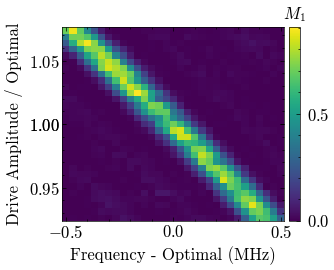

25011900006_eggf_piminuspi_gain_sweep_Q31
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\piminuspi_sweep_25011900006_eggf_piminuspi_gain_sweep_Q31.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\piminuspi_sweep_25011900006_eggf_piminuspi_gain_sweep_Q31.svg


In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cycle_sweep = data["cycle_sweep"]
label = "($X_{\pi}, X_{-\pi})^N$"


x_sweep = data['x_sweep']
y_sweep = data['y_sweep']

labelsize = 12

fig = plt.figure(figsize=(2.5*1.3, 2.0*1.3))
data_name = "products"
plot_data = data[data_name][0] * data[data_name][1]

a0 = plt.subplot(111)
a0.set_ylabel(f"Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.5, 0, 0.5])
ymin = np.min(y_sweep)
ymax = np.max(y_sweep)
ytick_spacing = 0.05
ytick_labels = np.round(np.linspace(ymin, ymax, int(np.ceil((ymax-ymin)/ytick_spacing))+1) /ytick_spacing) * ytick_spacing
a0.set_yticks(ytick_labels)

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.set_title("$M_1$", size=labelsize)

plt.tight_layout(pad=0.0)
plt.show()

print(filepaths_str)

savename = os.path.join(save_plot_path, f'piminuspi_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'piminuspi_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)


## Fig A3d: swap pi train

In [20]:
filepaths_str = "25011900071_eggf_train_Q31"
savename = os.path.join(pmp_folder, f'pipi_sweep_{filepaths_str}.npz')
data_pp = np.load(savename, allow_pickle=True)

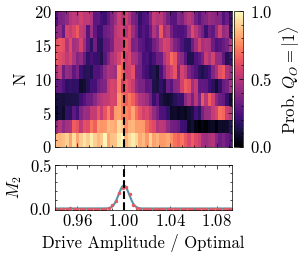

25011900071_eggf_train_Q31
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\pipi_25011900071_eggf_train_Q31.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\pipi_25011900071_eggf_train_Q31.svg


In [21]:
y_sweep = data_pp['y_sweep']
x_sweep = data_pp['x_sweep']

prod_data = data_pp["products"][0] * data_pp["products"][1]

x_sweep_fit = data_pp['x_sweep_fit']
fit_gain = 1

labelsize = 12
cmap = 'magma'

fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios':[1, 0.05]}, figsize=(3.0, 2.5))

axes[1,1].remove()

a0 = axes[0, 0]
plt.sca(a0)
a0.set_ylabel(f"N", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelbottom=False, labelsize=labelsize, pad=2)
data_name = "amps"
plot_data = data_pp[data_name][0] # 0 for qDrive, 1 for q1
scaled_e = np.max(plot_data)
scaled_g = np.min(plot_data)
scale_ge = scaled_e - scaled_g
plot_data = (plot_data - scaled_g) / scale_ge
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap=cmap, shading="auto")
plt.axvline(fit_gain, color="k", linestyle="--")

acbar = axes[0, 1]
cbar = plt.colorbar(cax=acbar, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label('Prob. $Q_O=|1\\rangle$', size=labelsize)

a1 = axes[1, 0]
a1.sharex(a0)
plt.sca(a1)
a1.set_ylabel("$M_2$", fontsize=labelsize)
a1.set_xlabel("Drive Amplitude / Optimal", fontsize=labelsize)
a1.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.plot(x_sweep_fit, data_pp['y_fit'])
plt.plot(x_sweep, prod_data, ".")
plt.axvline(fit_gain, color="k", linestyle="--")
# plt.ylim([-0.05, 0.4])
a1.set_yticks([0.0, 0.5])
a1.set_xticks([0.96, 1.0, 1.04, 1.08])

plt.tight_layout(pad=0.1)
plt.show()

print(filepaths_str)

savename = os.path.join(save_plot_path, f'pipi_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'pipi_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)

## Fig A3f: pi/pi sweep

In [22]:
filepaths_str = "25011900008_eggf_pipi_gain_sweep_Q31"
savename = os.path.join(pmp_folder, f'pipi_sweep_{filepaths_str}.npz')
data_pp_sweep = np.load(savename, allow_pickle=True)
data = data_pp_sweep

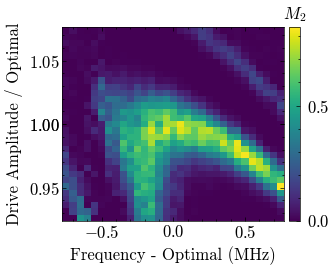

25011900008_eggf_pipi_gain_sweep_Q31
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\pipi_sweep_25011900008_eggf_pipi_gain_sweep_Q31.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\pipi_sweep_25011900008_eggf_pipi_gain_sweep_Q31.svg


In [23]:
x_sweep = data['x_sweep']
y_sweep = data['y_sweep']

labelsize = 12

fig = plt.figure(figsize=(2.5*1.3, 2.0*1.3))
data_name = "products"
plot_data = data[data_name][0] * data[data_name][1]

a0 = plt.subplot(111)
a0.set_ylabel(f"Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.5, 0, 0.5])
ymin = np.min(y_sweep)
ymax = np.max(y_sweep)
ytick_spacing = 0.05
ytick_labels = np.round(np.linspace(ymin, ymax, int(np.ceil((ymax-ymin)/ytick_spacing))+1) /ytick_spacing) * ytick_spacing
a0.set_yticks(ytick_labels)

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.set_title("$M_2$", size=labelsize)

plt.tight_layout(pad=0.0)
plt.show()

print(filepaths_str)

savename = os.path.join(save_plot_path, f'pipi_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'pipi_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)

## Fig A3g: product of pi/-pi and pi/pi

In [24]:
def calculate_gain_freq_tuples(qubits, pipi_data, piminuspi_data, opt_len, interpolate=True, plot=True, test_pi_half=True):
    if interpolate:
        pipi_freq_sweep, pipi_gain_sweep = pipi_data["freq_sweep"], pipi_data["gain_sweep"]
        piminuspi_freq_sweep, piminuspi_gain_sweep = piminuspi_data["freq_sweep"], piminuspi_data["gain_sweep"]
        reduced_freq_sweep = np.linspace(np.max([pipi_freq_sweep[0], piminuspi_freq_sweep[0]]), np.min([pipi_freq_sweep[-1], piminuspi_freq_sweep[-1]]), 20)
        reduced_gain_sweep = np.linspace(np.max([pipi_gain_sweep[0], piminuspi_gain_sweep[0]]), np.min([pipi_gain_sweep[-1], piminuspi_gain_sweep[-1]]), 25)
        reduced_y = reduced_gain_sweep
        reduced_x = reduced_freq_sweep
        
        print("reduced gain range", reduced_gain_sweep[0], "to", reduced_gain_sweep[-1])
        print("reduced freq range", reduced_freq_sweep[0], "to", reduced_freq_sweep[-1])

        fine_pipi_data = np.zeros((2, len(reduced_y), len(reduced_x)))
        fine_piminuspi_data = np.zeros((2, len(reduced_y), len(reduced_x)))
        for iq in range (2):
            y, x = pipi_gain_sweep, pipi_freq_sweep
            pipi_interp = sp.interpolate.RegularGridInterpolator((y, x), pipi_data["products"][iq], bounds_error=False, fill_value=0)

            y, x = piminuspi_gain_sweep, piminuspi_freq_sweep
            piminuspi_interp = sp.interpolate.RegularGridInterpolator((y, x), piminuspi_data["products"][iq], bounds_error=False, fill_value=0)

            yg, xg = np.meshgrid(reduced_y, reduced_x, indexing='ij')
            fine_pipi_data[iq] = pipi_interp((yg, xg))
            fine_piminuspi_data[iq] = piminuspi_interp((yg, xg))

    else:
        assert np.all([pipi_data["freq_sweep"][i] == piminuspi_data["freq_sweep"][i] for i in range(len(pipi_data["freq_sweep"]))])
        assert np.all([pipi_data["gain_sweep"][i] == piminuspi_data["gain_sweep"][i] for i in range(len(pipi_data["gain_sweep"]))])
        assert len(pipi_data["freq_sweep"]) == len(piminuspi_data["freq_sweep"])
        assert len(pipi_data["gain_sweep"]) == len(piminuspi_data["gain_sweep"])
        fine_pipi_data = pipi_data["products"]
        fine_piminuspi_data = piminuspi_data["products"]
        reduced_x = pipi_data["freq_sweep"]
        reduced_y = pipi_data["gain_sweep"]

    x_sweep = reduced_x
    y_sweep = reduced_y

    prod_of_prods_data_q = np.array([fine_piminuspi_data[i] * fine_pipi_data[i] for i in range(2)])

    qA, qB = qubits

    # Interpolated pi pi data
    label_pipi = "($X_{\pi}, X_{\pi})^N$"
    if test_pi_half:
        label_pipi = "($X_{\pi/2}, X_{\pi/2})^{2N}$"
    title = (
        f"Interpolated Q{qA}/Q{qB} Product of Ns for {label_pipi}\n Len {opt_len:.3f}, Ns={pipi_data['cycle_sweep'].tolist()}"
    )

    if plot:
        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_pipi_data[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_pipi_data[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

        # Interpolated pi -pi data
        label_piminuspi = "($X_{\pi}, X_{-\pi})^N$"
        if test_pi_half:
            # label_piminuspi = "($X_{\pi/2}, X_{-\pi/2})^{N}$"
            label_piminuspi = "($X_{\pi/2}, X_{\pi/2}, X_{-\pi/2}, X_{-\pi/2})^N$"
        title = (
            f"Interpolated Q{qA}/Q{qB} Product of Ns for {label_piminuspi}\n Len {opt_len:.3f}, Ns={piminuspi_data['cycle_sweep'].tolist()}"
        )

        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_piminuspi_data[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_piminuspi_data[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

        # Product of the two inteprolated data sets
        title = (
            f"Interpolated Q{qA}/Q{qB} Product {label_piminuspi} $\\times$ {label_pipi}\n Len {opt_len:.3f}"
        )

        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = prod_of_prods_data_q[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)
    
        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = prod_of_prods_data_q[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

    return np.prod(prod_of_prods_data_q, axis=0), x_sweep, y_sweep

In [25]:
from skimage.feature import blob_dog, blob_log, blob_doh # install scikit-image if needed
from matplotlib.patches import Ellipse

def find_blobs(data_2d, x_sweep, y_sweep):
    data_2d = (np.copy(data_2d) - np.min(data_2d))/(np.max(data_2d) - np.min(data_2d))
    blobs_log = blob_log(data_2d, max_sigma=5, min_sigma=3, num_sigma=10, threshold=0.1, exclude_border=True)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

    blobs_dog = blob_dog(data_2d, max_sigma=5, min_sigma=3, threshold=0.1, exclude_border=True)
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

    blobs_doh = blob_doh(data_2d, max_sigma=5, min_sigma=3, threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    idxy = np.argmax(data_2d)
    i_ymax, i_xmax = np.unravel_index(idxy, data_2d.shape)
    x_max = x_sweep[i_xmax]
    y_max = y_sweep[i_ymax]

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        # ax[idx].imshow(data_2d)
        plt.sca(ax[idx])
        plt.pcolormesh(x_sweep, y_sweep, data_2d, cmap="viridis", shading="auto")
        for blob in blobs:
            r, c, sigma = blob
            opt_freq = x_sweep[int(c)]
            opt_gain = y_sweep[int(r)]
            sigma_x = sigma * (x_sweep[1] - x_sweep[0])
            sigma_y = sigma * (y_sweep[1] - y_sweep[0])
            c = Ellipse((opt_freq, opt_gain), width=sigma_x, height=sigma_y, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        plt.plot(x_max, y_max, "o", markersize=8, markeredgecolor="r", markerfacecolor="None")
        plt.colorbar()
        # ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()
    return blobs_log


In [26]:
filepaths_str = "25011900008_eggf_pipi_gain_sweep_Q31"

reduced gain range 0.9263839811542992 to 1.073616018845701
reduced freq range -0.5 to 0.5


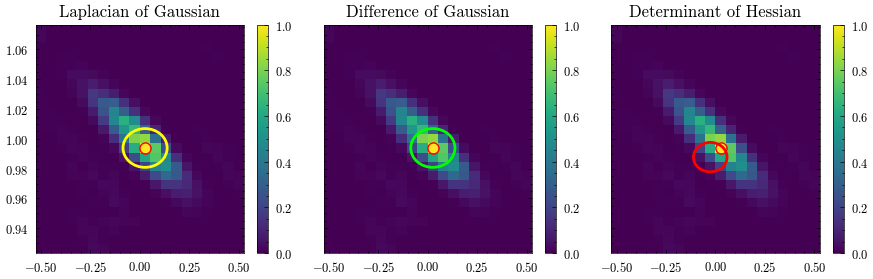

best freq from max 0.02631578947368418
best gain from max 0.9938653317628583
num blobs found 1
best freq from blob 0.02631578947368418
best gain from blob 0.9938653317628583


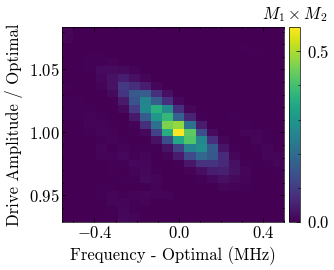

25011900008_eggf_pipi_gain_sweep_Q31
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\ppXpmp_sweep_25011900008_eggf_pipi_gain_sweep_Q31.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\ppXpmp_sweep_25011900008_eggf_pipi_gain_sweep_Q31.svg


In [27]:
pipi_data = data_pp_sweep
piminuspi_data = data_pmp_sweep

prod_of_prods_data, x_sweep, y_sweep = calculate_gain_freq_tuples([0, 0], pipi_data, piminuspi_data, opt_len=0, interpolate=True, plot=False)
blobs = find_blobs(prod_of_prods_data, x_sweep=x_sweep, y_sweep=y_sweep)

idxy = np.argmax(prod_of_prods_data)
ymax, xmax = np.unravel_index(idxy, prod_of_prods_data.shape)
pi_freq_max = x_sweep[xmax]
pi_gain_max = y_sweep[ymax]
print("best freq from max", pi_freq_max)
print("best gain from max", pi_gain_max)

print("num blobs found", len(blobs))
if len(blobs) > 0:
    r, c, sigma = blobs[0]
    pi_freq_blob = x_sweep[int(c)]
    pi_gain_blob = y_sweep[int(r)]
    sigma_x = sigma * (x_sweep[1] - x_sweep[0])
    sigma_y = sigma * (y_sweep[1] - y_sweep[0])
    print("best freq from blob", pi_freq_blob)
    print("best gain from blob", pi_gain_blob)

if len(blobs) == 0:
    print("WARNING: no blobs found!")
elif np.abs(pi_freq_max - pi_freq_blob) > 2*sigma_x or np.abs(pi_gain_max - pi_gain_blob) > 2*sigma_y:
    print('WARNING: max product location is not close to found blob center!')


opt_freq = pi_freq_blob
opt_gain = pi_gain_blob
# opt_freq = pi_freq_max
# opt_gain = pi_gain_max

x_sweep -= opt_freq
y_sweep /= opt_gain

labelsize = 12

fig = plt.figure(figsize=(2.5*1.3, 2.0*1.3))
plot_data = prod_of_prods_data

a0 = plt.subplot(111)
a0.set_ylabel("Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.4, 0, 0.4])
a0.set_yticks([0.95, 1.0, 1.05])

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.set_title("$M_1 \\times M_2$", size=labelsize)

plt.tight_layout(pad=0.0)
plt.show()

print(filepaths_str)

savename = os.path.join(save_plot_path, f'ppXpmp_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'ppXpmp_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    
    

# Fig A2: calibrating length for leakage with wrong switch state

In [28]:
timestamp = '250119'
swap_leak_save_path = os.path.join(os.getcwd(), "SWAP_leakage")

save_names = [os.path.join(swap_leak_save_path, f'leakage_21_{timestamp}.npz'),
            os.path.join(swap_leak_save_path, f'leakage_31_{timestamp}.npz'), 
            os.path.join(swap_leak_save_path, f'leakage_21_fast_{timestamp}.npz'),
            os.path.join(swap_leak_save_path, f'leakage_31_fast_{timestamp}.npz')]              
    

data_21_saved = np.load(save_names[0], allow_pickle=True)
data_31_saved = np.load(save_names[1], allow_pickle=True)
data_21_fast_saved = np.load(save_names[2], allow_pickle=True)
data_31_fast_saved = np.load(save_names[3], allow_pickle=True)

data_21 = data_21_saved['data']
data_31 = data_31_saved['data']
data_21_fast = data_21_fast_saved['data']
data_31_fast = data_31_fast_saved['data']
leakage_lens_21 = data_21_saved['leakage_lens']
leakage_lens_31 = data_31_saved['leakage_lens']
leakage_lens_21_fast = data_21_fast_saved['leakage_lens']
leakage_lens_31_fast = data_31_fast_saved['leakage_lens']

In [29]:
pop_Bgf_21 = []
depths_21 = []
all_epop_reshaped_q1q2 = np.array([])

for data in data_21:
    pop_Bgf_21.append(data["popln_Bgf_avg"]+ data["popln_Bge_avg"])
    depths = data["xpts"]
    unique_depths = np.average(depths, axis=0)
    depths_21.append(unique_depths)

pop_Bgf_31 = []
depths_31 = []
for data in data_31:
    pop_Bgf_31.append(data["popln_Bgf_avg"] + data["popln_Bge_avg"])
    depths = data["xpts"]
    unique_depths = np.average(depths, axis=0)
    depths_31.append(unique_depths)

In [30]:
pop_Bgf_21_fast = []
depths_21_fast = []
for data in data_21_fast:
    pop_Bgf_21_fast.append(data["popln_Bgf_avg"]+ data["popln_Bge_avg"])
    depths = data["xpts"]
    unique_depths = np.average(depths, axis=0)
    depths_21_fast.append(unique_depths)

pop_Bgf_31_fast = []
depths_31_fast = []
for data in data_31_fast:
    pop_Bgf_31_fast.append(data["popln_Bgf_avg"] + data["popln_Bge_avg"])
    depths = data["xpts"]
    unique_depths = np.average(depths, axis=0)
    depths_31_fast.append(unique_depths)

Plotting the wrong state minima to highlight the ones we are using

In [31]:
theory_dir = "S:\QRAM\qram_4QR2\plots\paper\supmat"
theory_q2_path = "theory_pop_q2_wrongstate"
theory_q3_path = "theory_pop_q3_wrongstate"

data_theory_q2 = dict()
with np.load(os.path.join(theory_dir, theory_q2_path+".npz")) as file:
    for key in file.keys():
        data_theory_q2[key] = file[key]
data_theory_q3 = dict()
with np.load(os.path.join(theory_dir, theory_q3_path+".npz")) as file:
    for key in file.keys():
        data_theory_q3[key] = file[key]

In [32]:
filepaths_str = "25011900002_eggf_1qtomo_sweepQ3_tomoQ3"
savepath = os.path.join(os.getcwd(), "SWAP_leakage", filepaths_str)
wrong_epop_sweep_dict = dict()
with np.load(savepath + ".npz") as npzfile:
    len_q1q3 = npzfile["lengths"]
    freq_q1q3 = npzfile["freqs"]
    all_epop_reshaped_q1q3 = npzfile["all_epop_reshaped"]

filepaths_str = "25011900001_eggf_1qtomo_sweepQ2_tomoQ2"
savepath = os.path.join(os.getcwd(), "SWAP_leakage", filepaths_str)
wrong_epop_sweep_dict = dict()
with np.load(savepath + ".npz") as npzfile:
    len_q1q2 = npzfile["lengths"]
    freq_q1q2 = npzfile["freqs"]
    all_epop_reshaped_q1q2 = npzfile["all_epop_reshaped"]

filepaths_str = "25011900002_eggf_1qtomo_sweepQ3_tomoQ3_fast"
savepath = os.path.join(os.getcwd(), "SWAP_leakage", filepaths_str)
wrong_epop_sweep_dict = dict()
with np.load(savepath + ".npz") as npzfile:
    len_q1q3_fast = npzfile["lengths"]
    all_epop_reshaped_q1q3_fast = npzfile["all_epop_reshaped"]


filepaths_str = "25011900001_eggf_1qtomo_sweepQ2_tomoQ2_fast"
savepath = os.path.join(os.getcwd(), "SWAP_leakage", filepaths_str)
wrong_epop_sweep_dict = dict()
with np.load(savepath + ".npz") as npzfile:
    len_q1q2_fast = npzfile["lengths"]
    all_epop_reshaped_q1q2_fast = npzfile["all_epop_reshaped"]

In [33]:
t_vec_12 = data_theory_q2['t_vec_12']
t_vec_13 = data_theory_q3['t_vec_13']
pop_q2 = data_theory_q2['pop_q2']
pop_q3 = data_theory_q3['pop_q3']
amp_vec_12 = data_theory_q2['amp_vec_12']
amp_vec_13 = data_theory_q3['amp_vec_13']
w_vec_12 = data_theory_q2['w_vec_12']
w_vec_13 = data_theory_q3['w_vec_13']

len_q1q3_combo = np.append(len_q1q3, len_q1q3_fast)
all_epop_reshaped_q1q3 = np.append(all_epop_reshaped_q1q3, all_epop_reshaped_q1q3_fast, axis=1)
print(all_epop_reshaped_q1q3.shape)
e_pop_avg_q1q3 = np.average(all_epop_reshaped_q1q3, axis=0)
e_pop_std_q1q3 = np.std(all_epop_reshaped_q1q3, axis=0)

len_q1q2_combo = np.append(len_q1q2[:-6], len_q1q2_fast)
all_epop_reshaped_q1q2 = np.append(all_epop_reshaped_q1q2[:, :-6], all_epop_reshaped_q1q2_fast, axis=1)
print(all_epop_reshaped_q1q2.shape, len_q1q2_combo.shape)
e_pop_avg_q1q2 = np.average(all_epop_reshaped_q1q2, axis=0)
e_pop_std_q1q2 = np.std(all_epop_reshaped_q1q2, axis=0)

(10, 35)
(10, 29) (29,)


In [34]:
def get_bad(qDrive):
    if qDrive == 2: return "e"
    if qDrive == 3: return "g"
    return None

def get_good(qDrive):
    if qDrive == 3: return "e"
    if qDrive == 2: return "g"
    return None

q2/q1 pi/2 length 0.236859238200425
q2/q1 pi/2 length 0.22816247678777374
q2/q1 pi/2 length 0.21303094516365295
q2/q1 pi/2 length 0.195
q2/q1 pi/2 length 0.185
q2/q1 pi/2 length 0.175
q3/q1 pi/2 length 0.05
q3/q1 pi/2 length 0.06
q3/q1 pi/2 length 0.067
q3/q1 pi/2 length 0.07
q3/q1 pi/2 length 0.08


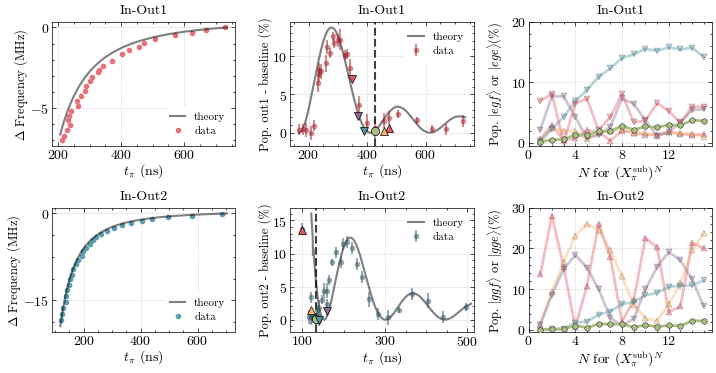

250119_00006_00007_00008_00009_00019_00010_31_00002_00003_00004_00005_00011_00012_00013_21
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\swap_minima_calib_250119_00006_00007_00008_00009_00019_00010_31_00002_00003_00004_00005_00011_00012_00013_21.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\swap_minima_calib_250119_00006_00007_00008_00009_00019_00010_31_00002_00003_00004_00005_00011_00012_00013_21.svg


In [36]:
saveplot = True 

labelsize = 10
keep_lens_21 = [0, 1, 2, 4, 5, 6]
good_ilen_21 = 2

keep_lens_31 = [0, 1, 2, 3, 4]
good_ilen_31 = 2

opt_len_12 = 0.2130
opt_len_13 = 0.067

color_cycle = ['#e15b64', '#fbb26d', '#abbd83', '#5296a5', '#8d6b94']

color_cycle_21 = color_cycle
marker_cycle_21 = ["^"]*(good_ilen_21) + ["o"] + ["v"]*(len(keep_lens_21) - good_ilen_21 - 1)

color_cycle_31 = color_cycle
marker_cycle_31 = ["^"]*(good_ilen_31) + ["o"] + ["v"]*(len(keep_lens_31) - good_ilen_31 - 1)

color_dict = {'q1q3_right': '#5b9faeff', 'q1q3_wrong': '#2f5760ff', 'q1q2_right': '#e5717aff', 'q1q2_wrong': '#a31f29ff'}

fig, axes = plt.subplots(2, 3, figsize=(8.0, 4.0), sharey=False, gridspec_kw={'width_ratios':[1, 1, 1]})
plt.subplots_adjust(hspace=0.5) 
plt.subplots_adjust(wspace=0.3) 


#==============#
# plot the stark shift check

x12_th = t_vec_12
x12_th_alt = 1/(2*t_vec_12)
y12_th = 1e3*np.array(w_vec_12/2/np.pi)
x12_exp = len_q1q2*1e3*2
y12_exp = freq_q1q2

x13_th = t_vec_13
x13_th_alt = 1/(2*t_vec_13)
y13_th = 1e3*np.array(w_vec_13/2/np.pi)
x13_exp = len_q1q3*1e3*2
y13_exp = freq_q1q3

idx_12_start = np.argmin(np.abs(x12_exp[0] - x12_th))
idx_12_stop = np.argmin(np.abs(x12_exp[-1] - x12_th))

idx_13_start = np.argmin(np.abs(x13_exp[0] - x13_th))
idx_13_stop = np.argmin(np.abs(x13_exp[-1] - x13_th))


ax = axes[0, 0]
plt.sca(ax)
ax.set_title("In-Out1", size=labelsize)
plt.grid(which='major')
ax.plot(x12_th[idx_12_start:idx_12_stop], y12_th[idx_12_start:idx_12_stop] - y12_th[idx_12_start], alpha=0.5, color='black', label='theory', zorder=10)
ax.errorbar(x12_exp[:-3], y12_exp[:-3] - y12_exp[0], fmt='o', color=color_dict['q1q2_right'], label='data')
ax.set_xlabel('$t_\pi$ (ns)', labelpad=0.3, fontsize=labelsize)
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax.set_ylabel('$\Delta$ Frequency (MHz)', labelpad=0.3)
ax.set_yticks([-5, 0])
ax.set_xticks([200, 400, 600])
ax.legend()

ax = axes[1, 0]
plt.sca(ax)
ax.set_title("In-Out2", size=labelsize)
plt.grid(which='major')
ax.plot(x13_th[idx_13_start:idx_13_stop], y13_th[idx_13_start:idx_13_stop] - y13_th[idx_13_start], alpha=0.5, color='black', label='theory', zorder=10)
ax.errorbar(x13_exp[1:-1], y13_exp[1:-1] - y13_exp[0], fmt='o', color=color_dict['q1q3_right'], label='data')
ax.set_xlabel('$t_\pi$ (ns)', labelpad=0.3, fontsize=labelsize)
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax.set_xticks([200, 400, 600])
ax.set_ylabel('$\Delta$ Frequency (MHz)', labelpad=0.3)
ax.set_yticks([-15, 0])
ax.legend()


#==============#

leakage_pops_21 = []
for i_leak in keep_lens_21:
    leakage_pops_21.append(pop_Bgf_21[i_leak][np.argwhere(depths_21[i_leak] == 1)[0][0]])
leakage_pops_21 = np.array(leakage_pops_21)
leakage_pops_31 = []
for i_leak in keep_lens_31:
    leakage_pops_31.append(pop_Bgf_31_fast[i_leak][np.argwhere(depths_31_fast[i_leak] == 1)[0][0]])
leakage_pops_31 = np.array(leakage_pops_31)

#==============#
#  plot the minima experiment

x12_th = t_vec_12
x12_th_alt = 1/(2*t_vec_12)
baseline_12 = 0.06
y12_th = np.array(pop_q2)
x12_exp = len_q1q2_combo*1e3*2
y12_exp = e_pop_avg_q1q2[::-1]
y12_exp = np.array(e_pop_avg_q1q2) - baseline_12
y12_err = e_pop_std_q1q2[::-1]

x13_th = t_vec_13
x13_th_alt = 1/(2*t_vec_13)
baseline_13 = 0.045
y13_th = np.array(pop_q3)
x13_exp = len_q1q3_combo*1e3*2
y13_exp = e_pop_avg_q1q3[::-1]
y13_exp = np.array(e_pop_avg_q1q3) - baseline_13
y13_err = e_pop_std_q1q3[::-1]

idx_12_start = np.argmin(np.abs(x12_exp[0] - x12_th))
idx_12_stop = np.argmin(np.abs(x12_exp[-1] - x12_th))

idx_13_start = 12
idx_13_stop = np.argmin(np.abs(x13_exp[-1] - x13_th)) + 45


ax = axes[0, 1]
plt.sca(ax)
ax.set_title("In-Out1", size=labelsize)
plt.grid(which='major')
ax.plot(x12_th[idx_12_start:idx_12_stop], 100*y12_th[idx_12_start:idx_12_stop], alpha=0.5, color='black', label='theory')
ax.errorbar(x12_exp, 100*y12_exp, 100*y12_err, fmt='o', alpha=0.5, markeredgewidth=0.0, markersize=4, color=color_dict['q1q2_wrong'], label='data')
for i, i_leak in enumerate(keep_lens_21):
    print("q2/q1 pi/2 length", leakage_lens_21[i_leak])
    ax.plot(2*1e3*leakage_lens_21[i_leak], 100*leakage_pops_21[i], marker_cycle_21[i % len(marker_cycle_21)], markeredgewidth=0.5, markeredgecolor='k', markersize=6, color=color_cycle_21[i % len(color_cycle_21)], zorder=10)
ax.axvline(2*1e3*opt_len_12, color='black', linestyle='--', alpha=0.75)
ax.set_xlabel('$t_\pi$ (ns)', labelpad=0.3, fontsize=labelsize)
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax.set_ylabel('Pop. out1 - baseline (%)', labelpad=0.3)
ax.set_xticks([200, 400, 600])
ax.legend()

ax = axes[1, 1]
plt.sca(ax)
ax.set_title("In-Out2", size=labelsize)
plt.grid(which='major')
ax.plot(x13_th[idx_13_start:idx_13_stop], 100*y13_th[idx_13_start:idx_13_stop], alpha=0.5, color='black', label='theory')
ax.errorbar(x13_exp[1:], 100*y13_exp[1:], 100*y13_err[1:], fmt='o', alpha=0.5, markeredgewidth=0.0, markersize=4, color=color_dict['q1q3_wrong'], label='data')
for i, i_leak in enumerate(keep_lens_31):
    print("q3/q1 pi/2 length", leakage_lens_31_fast[i_leak])
    ax.plot(2*1e3*leakage_lens_31_fast[i_leak], 100*leakage_pops_31[i], marker_cycle_31[i % len(marker_cycle_31)], markeredgewidth=0.5, markeredgecolor='k', markersize=6, color=color_cycle_31[i % len(color_cycle_31)], zorder=10)
ax.axvline(2*1e3*opt_len_13, color='black', linestyle='--', alpha=0.75)
ax.set_xlabel('$t_\pi$ (ns)', labelpad=0.3, fontsize=labelsize)
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax.set_xlim(None, 515)
ax.set_xticks([100, 300, 500])
ax.set_ylabel('Pop. out2 - baseline (%)', labelpad=0.3)
ax.legend()

#==============#
#  plot the leakage error amp

ax = axes[0, 2]
plt.sca(ax)
plt.grid(which='major')
plt.title("In-Out1", size=labelsize)
for i, i_leak in enumerate(keep_lens_21):
    if i == good_ilen_21:
        zorder = 10
        alpha = 1.0
    else:
        zorder = None
        alpha = 0.4
    plt.plot(depths_21[i_leak][:15], 100*pop_Bgf_21[i_leak][:15], marker_cycle_21[i % len(marker_cycle_21)]+'-',alpha=alpha, markeredgewidth=0.3, markeredgecolor='k', markersize=4, linewidth=2.0, color=color_cycle_21[i % len(color_cycle_21)], zorder=zorder)
plt.ylabel(f"Pop. $|{get_bad(2)}gf\\rangle$ or $|{get_bad(2)}ge\\rangle$(%)")
label = "$N$ for $(X_{\pi}^{\mathrm{sub}})^N$"
plt.xlabel(label, fontsize=labelsize, labelpad=0.3)
ax.set_xticks(np.arange(0, 16, 4))
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.ylim(-0.5, 20.0)

ax = axes[1, 2]
plt.sca(ax)
plt.title("In-Out2", size=labelsize)
plt.grid(which='major')
for i, i_leak in enumerate(keep_lens_31):
    if i == good_ilen_31:
        zorder = 10
        alpha = 1.0
    else:
        zorder = None
        alpha = 0.4
    plt.plot(depths_31_fast[i_leak][:15], 100*pop_Bgf_31_fast[i_leak][:15], marker_cycle_31[i % len(marker_cycle_31)]+'-',alpha=alpha, markeredgewidth=0.3, markeredgecolor='k', markersize=4, linewidth=2.0, color=color_cycle_31[i % len(color_cycle_31)], zorder=zorder)
plt.ylabel(f"Pop. $|{get_bad(3)}gf\\rangle$ or $|{get_bad(3)}ge\\rangle$(%)")
label = "$N$ for $(X_{\pi}^{\mathrm{sub}})^N$"
plt.xlabel(label, fontsize=labelsize, labelpad=0.3)
ax.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax.set_xticks(np.arange(0, 16, 4))
plt.ylim(-0.5, 30)



plt.show()

filepaths_str = "250119_00006_00007_00008_00009_00019_00010_31_00002_00003_00004_00005_00011_00012_00013_21"
print(filepaths_str)

savename = os.path.join(save_plot_path, f'swap_minima_calib_{filepaths_str}.pdf')
print("Saving", savename)
if saveplot: fig.savefig(savename)

savename = os.path.join(save_plot_path, f'swap_minima_calib_{filepaths_str}.svg')
print("Saving", savename)
if saveplot: fig.savefig(savename)

# Fig 3g-h: pi/pi probing good/bad states

In [37]:
swap_leak_save_path = os.path.join(os.getcwd(), "SWAP_leakage")
savename_swap_21_31 = os.path.join(swap_leak_save_path, f'swap_leakage_data_data_250119_31_21.npz') 
data_dict = np.load(savename_swap_21_31, allow_pickle=True)['data_dict'].item()

leakage_paths = dict(
    bad_31="00032_leakage_EgGf_qubit31",
    good_31="00027_leakage_EgGf_qubit31",
    bad_21="00004_leakage_EgGf_qubit21",
    good_21="00009_leakage_EgGf_qubit21", 
)

In [40]:
def get_bad(qDrive):
    if qDrive == 2: return "e"
    if qDrive == 3: return "g"
    return None

def get_good(qDrive):
    if qDrive == 3: return "e"
    if qDrive == 2: return "g"
    return None

In [41]:
pop_dict = dict()
depths_dict = dict()

for name in data_dict.keys():
    data = data_dict[name]
    if "bad" in name:
        pop_dict[name] = data["popln_Bgf_avg"] + data["popln_Bge_avg"]
    else:
        pop_dict[name] = data["popln_Ggf_avg"]
    depths = data["xpts"]
    unique_depths = np.average(depths, axis=0)
    depths_dict[name] = unique_depths
    print(name, unique_depths)

bad_31 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
good_31 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
bad_21 [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
good_21 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
Total leakage after 15.0 gates (%) bad_21 3.623681842837121
Leakage per gate (%) bad_21 0.24157878952247472
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
Total leakage after 15.0 gates (%) bad_31 2.2094760111077303
Leakage per gate (%) bad_31 0.14729840074051534


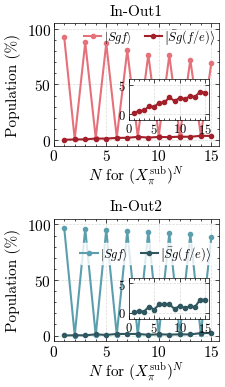

250119_bad_31_00032_good_31_00027_bad_21_00004_good_21_00009
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\leakage_error_amp_250119_bad_31_00032_good_31_00027_bad_21_00004_good_21_00009.pdf
Saving s:\Connie\experiments\qram_tprocv1_expts\data_plot\leakage_error_amp_250119_bad_31_00032_good_31_00027_bad_21_00004_good_21_00009.svg


In [42]:
darkmode = False

plt.style.use('default') # need to set this first to reset out of dark mode
plt.style.use(mplstyle_path)
if darkmode: plt.style.use('dark_background')

color_dict = {'good_31': '#5b9faeff', 'bad_31': '#2f5760ff', 'good_21': '#e5717aff', 'bad_21': '#a31f29ff'}

labelsize = 11

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Custom transformation function
def custom_transform(x):
    new_x = x.astype(np.float64)
    for i, xx in enumerate(x):
        if xx < 2:
            new_x[i] *= 50 / 2  # Compressing factor for values between 0 and 2
        else:
            new_x[i] = 50 + (xx - 2) * (1 + 50 / 98)  # Linear scaling from 2 to 100
    return new_x

# Inverse transformation function
def inverse_transform(x):
    new_x = x.astype(np.float64)
    for i, xx in enumerate(x):
        if xx < 2:
            new_x[i] *= 2 / 50  # Compressing factor for values between 0 and 2
        else:
            new_x[i] = (xx - 50) / (1 + 50 / 98) + 2 # Linear scaling from 2 to 100
    return new_x

fig, ax = plt.subplots(2, 1, figsize=(2.0, 4.1), sharey=False)
plt.subplots_adjust(hspace=0.6) 
plt.subplots_adjust(wspace=0.3) 

plt.sca(ax[0])
plt.grid(which='major')
plt.title("In-Out1", fontsize=labelsize)

name = "good_21"
label = "$\\left|Sgf\\right>$"
plt.plot(depths_dict[name], 100*pop_dict[name], 'o-', label=label, color=color_dict[name])
name = "bad_21"
label = "$\\left|\\bar{S}g(f/e)\\right>$"
print(depths_dict[name][:15])
plt.plot(depths_dict[name][:15], 100*pop_dict[name][:15], 'o-', label=label, color=color_dict[name])
plt.ylabel(f"Population (%)", fontsize=labelsize)
label = "$N$ for $(X_{\pi}^{\mathrm{sub}})^N$"
plt.xlabel(label, fontsize=labelsize, labelpad=0.3)
ax[0].set_xticks(np.arange(0, 16, 5))
ax[0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.ylim(-5, 105)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.06), ncol=2, handletextpad=0.2, frameon=False, fontsize=labelsize-2, framealpha=0.75)

# Inset
left, bottom, width, height = [0.50, 0.715, 0.4, 0.1]
ax0_1 = fig.add_axes([left, bottom, width, height])
name = "bad_21"
print(depths_dict[name][:15])
plt.plot(depths_dict[name][:15], 100*pop_dict[name][:15], 'o-', color=color_dict[name])
print(f"Total leakage after {depths_dict[name][14]} gates (%)", name, 100*pop_dict[name][14])
print("Leakage per gate (%)", name, 100*pop_dict[name][14] / depths_dict[name][14])
plt.ylim(-1.0, 6.0)
plt.grid(which='major')
ax0_1.set_yticks([0, 5])
ax0_1.set_xticks([0, 5, 10, 15])
ax0_1.yaxis.set_minor_locator(plt.NullLocator())
ax0_1.tick_params(axis="both", which="both", labelsize=labelsize-2, pad=2)

plt.sca(ax[1])
plt.title("In-Out2", fontsize=labelsize)
plt.grid(which='major')
name = "good_31"
label = "$\\left|Sgf\\right>$"
plt.plot(depths_dict[name][:15], 100*pop_dict[name][:15], 'o-', label=label, color=color_dict[name])
name = "bad_31"
label = "$\\left|\\bar{S}g(f/e)\\right>$"
print(depths_dict[name][:15])
plt.plot(depths_dict[name][:15], 100*pop_dict[name][:15], 'o-', label=label, color=color_dict[name])
plt.ylabel(f"Population (%)", fontsize=labelsize)
label = "$N$ for $(X_{\pi}^{\mathrm{sub}})^N$"
plt.xlabel(label, fontsize=labelsize, labelpad=0.3)
ax[1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
ax[1].set_xticks(np.arange(0, 16, 5))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.85), ncol=2, borderpad=0.05, handletextpad=0.2, frameon=True, fontsize=labelsize-2, framealpha=0.8)
ax[1].sharey(ax[0])

# Inset
left, bottom, width, height = [0.50, 0.230, 0.4, 0.1]
ax0_1 = fig.add_axes([left, bottom, width, height])
name = "bad_31"
print(depths_dict[name][:15])
plt.plot(depths_dict[name][:15], 100*pop_dict[name][:15], 'o-', color=color_dict[name])
print(f"Total leakage after {depths_dict[name][14]} gates (%)", name, 100*pop_dict[name][14])
print("Leakage per gate (%)", name, 100*pop_dict[name][14] / depths_dict[name][14])
plt.ylim(-1.0, 6.0)
plt.grid(which='major')
ax0_1.set_yticks([0, 5])
ax0_1.set_xticks([0, 5, 10, 15])
ax0_1.yaxis.set_minor_locator(plt.NullLocator())
ax0_1.tick_params(axis="both", which="both", labelsize=labelsize-2, pad=2)
plt.show()

filepaths_str = "250119_bad_31_00032_good_31_00027_bad_21_00004_good_21_00009"
filepaths_str += '_dark' if darkmode else ''

print(filepaths_str)

savename = os.path.join(save_plot_path,  f'leakage_error_amp_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename, transparent=False)

savename = os.path.join(save_plot_path, f'leakage_error_amp_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename, transparent=False)